In [1]:
import sklearn 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics

In [2]:
digits = load_digits()

In [10]:
print("Image data shape :", digits.data.shape)

Image data shape : (1797, 64)


In [12]:
print("Label data shape :", digits.target.shape)

Label data shape : (1797,)


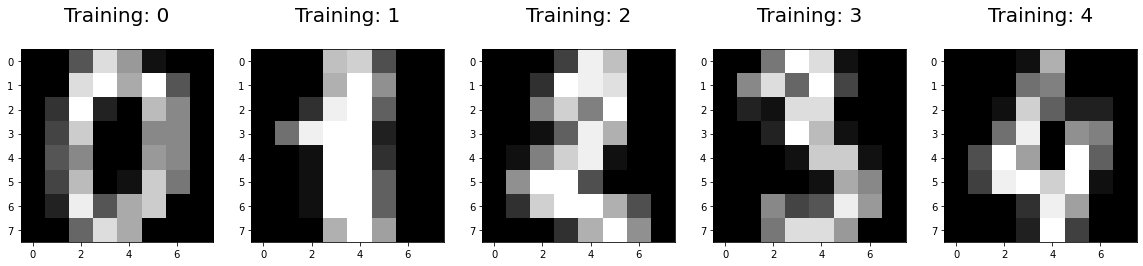

In [44]:
plt.figure(figsize =(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25)

In [47]:
print(X_train.shape)

(1347, 64)


In [48]:
print(X_test.shape)

(450, 64)


In [49]:
print(y_train.shape)

(1347,)


In [50]:
print(y_test.shape)

(450,)


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logistic_reg = LogisticRegression()

In [56]:
logistic_reg.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
print(logistic_reg.predict(X_test[0].reshape(1,-1)))

[5]


In [64]:
predictions = logistic_reg.predict(X_test)
predictions

array([5, 5, 4, 7, 3, 9, 4, 0, 2, 0, 4, 6, 5, 1, 2, 9, 5, 4, 2, 1, 0, 5,
       2, 6, 9, 1, 2, 3, 7, 8, 7, 4, 1, 2, 8, 6, 7, 6, 7, 2, 1, 0, 8, 1,
       0, 2, 4, 5, 0, 2, 6, 9, 9, 0, 0, 2, 8, 1, 5, 0, 3, 7, 6, 6, 6, 7,
       6, 3, 5, 0, 3, 4, 4, 5, 3, 3, 5, 9, 7, 4, 5, 4, 0, 9, 7, 9, 4, 4,
       0, 3, 7, 7, 6, 1, 2, 2, 5, 2, 4, 2, 8, 6, 4, 2, 2, 6, 6, 0, 0, 5,
       2, 9, 5, 7, 9, 1, 9, 8, 0, 7, 2, 4, 6, 0, 2, 8, 7, 1, 6, 3, 1, 8,
       8, 1, 7, 5, 3, 0, 0, 9, 9, 3, 4, 9, 2, 2, 0, 2, 1, 1, 3, 2, 9, 9,
       6, 5, 4, 7, 2, 9, 6, 2, 9, 2, 3, 0, 5, 8, 3, 3, 0, 3, 8, 3, 1, 7,
       5, 3, 3, 5, 0, 5, 5, 9, 6, 5, 9, 0, 1, 8, 8, 8, 1, 6, 4, 3, 3, 8,
       2, 2, 3, 9, 0, 6, 8, 9, 7, 1, 4, 2, 5, 1, 3, 3, 3, 6, 1, 6, 1, 1,
       1, 5, 5, 2, 9, 0, 6, 0, 6, 8, 4, 1, 5, 2, 9, 7, 8, 7, 5, 4, 3, 5,
       2, 8, 0, 1, 7, 3, 8, 4, 1, 9, 5, 8, 1, 4, 7, 5, 1, 1, 1, 2, 4, 0,
       9, 0, 7, 5, 7, 8, 2, 3, 4, 7, 9, 2, 4, 8, 6, 3, 0, 5, 5, 1, 7, 1,
       0, 9, 2, 6, 3, 9, 8, 5, 0, 2, 8, 4, 4, 6, 8,

In [69]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score*100

97.33333333333334

In [70]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[45  0  0  0  1  0  3  0  0  0]
 [ 0 44  0  0  0  0  0  0  1  1]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  1  0  0 42  0  1  0  0  0]
 [ 0  0  0  1  0 53  0  0  0  0]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


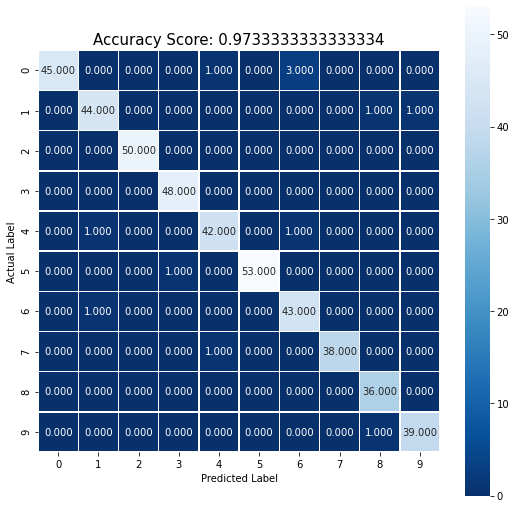

In [73]:
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot = True, fmt=".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

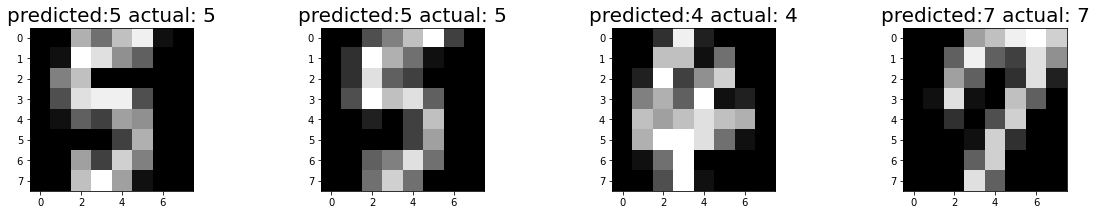

In [78]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)), cmap = plt.cm.gray)
    plt.title("predicted:{} actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize = 20)